In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Boston House Prediction/housing.csv')

In [3]:
dataset.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
dataset.shape

(489, 4)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
dataset.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [7]:
# filling missing values with means of respective columns
#new_data = dataset.fillna({'CRIM':dataset.iloc[:,0].mean(),'ZN':dataset.iloc[:,1].mean(),'INDUS':dataset.iloc[:,2].mean(),'CHAS':dataset.iloc[:,3].mean(),'AGE':dataset.iloc[:,6].mean(),'LSTAT':dataset.iloc[:,12].mean()})

In [8]:
#new_data.isnull().sum()

In [9]:
#new_data.head()

In [60]:
prices = dataset['MEDV'] # price column
features = dataset.drop('MEDV', axis = 1)#separating the price column from the dataset. axis = 1 means working along the row

In [61]:
#data = new_data.drop(columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','AGE','DIS','RAD','B'], axis = 1)

In [13]:
# Minimum price of the data
minimum_price = np.amin(prices) 
#amin and amax is different from normal min and max as the latter ones will give extreme values of full array whereas former ones will give according to the column or row as specified

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $MEDV    105000.0
dtype: float64
Maximum price: $MEDV    1024800.0
dtype: float64
Mean price: $MEDV    454342.944785
dtype: float64
Median price $438900.0
Standard deviation of prices: $MEDV    165171.131544
dtype: float64


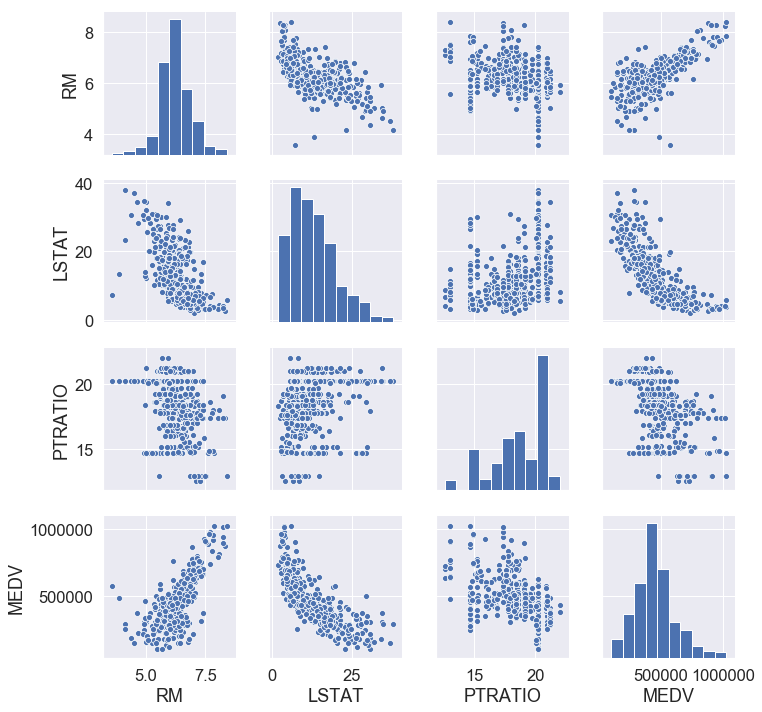

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate and show pairplot
sns.pairplot(dataset, size=2.5)
plt.show()

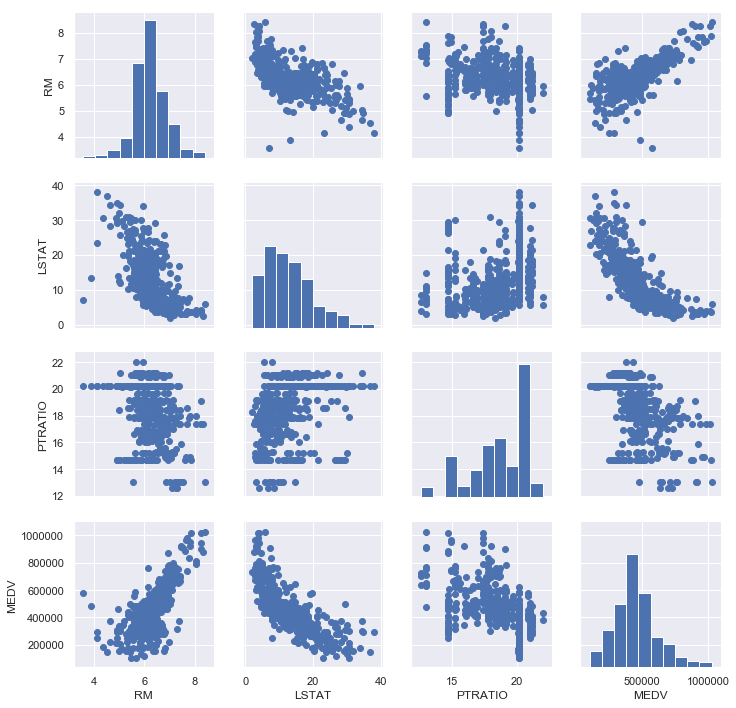

In [80]:
import seaborn as sns ; sns.set()
g = sns.PairGrid(dataset)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

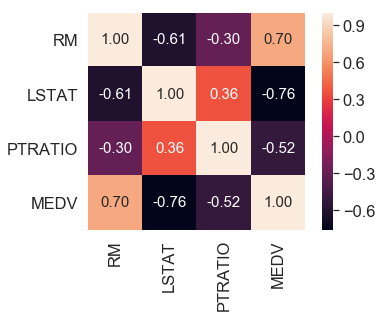

In [15]:
# Calculate and show correlation matrix
cm = np.corrcoef(dataset.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=dataset.columns,
                xticklabels=dataset.columns)

In [16]:
from sklearn.metrics import r2_score

In [17]:
# define a performance metric for the model to be made
def performance_metric(y_test, y_pred):
    score = r2_score(y_test, y_pred)
    return score

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

In [33]:
from sklearn import linear_model

In [34]:
reg = linear_model.Lasso(alpha=0.1)

In [35]:
reg.fit(dataset.iloc[:,[0]], prices)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
reg.predict(y_test)

array([7.18356849e+10, 8.98887986e+10, 5.71675300e+10, 2.63267942e+10,
       4.43799079e+10, 6.95790457e+10, 4.77648667e+10, 1.75641089e+11,
       6.58179804e+10, 8.76321594e+10, 7.10834718e+10, 7.07073653e+10,
       4.81409732e+10, 7.25878980e+10, 5.00215059e+10, 9.10171182e+10,
       4.73887601e+10, 5.30303582e+10, 4.09949490e+10, 8.08622418e+10,
       7.97339221e+10, 1.11326871e+11, 6.43135542e+10, 1.33141050e+11,
       7.52206437e+10, 7.82294960e+10, 6.39374477e+10, 1.20353428e+11,
       1.33141050e+11, 1.88046635e+10, 9.96675685e+10, 5.90480627e+10,
       9.25215443e+10, 8.34949875e+10, 4.92692928e+10, 8.80082659e+10,
       9.02649051e+10, 7.10834718e+10, 1.18472895e+11, 1.31260517e+11,
       6.28091281e+10, 5.64153170e+10, 4.40038013e+10, 7.29640045e+10,
       6.54418738e+10, 9.06410117e+10, 7.59728568e+10, 7.52206437e+10,
       6.31852346e+10, 6.88268326e+10, 4.06188425e+10, 1.15840150e+11,
       9.25215443e+10, 6.09285954e+10, 5.86719562e+10, 8.57516267e+10,
      

In [43]:
print('Intercept: \n', reg.intercept_) #intercept 
print('Coefficients: \n', reg.coef_) #slope

Intercept: 
 [-663282.40121685]
Coefficients: 
 [179098.35002349]


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
y_pred = reg.predict(y_test)